In [121]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [123]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [124]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25)
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

In [125]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (5,5), padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_26 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 7, 7, 64)       

In [126]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [127]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
352/352 [==============================] - 28s 77ms/step - loss: 0.5930 - accuracy: 0.7876 - val_loss: 0.4180 - val_accuracy: 0.8469
Epoch 2/100
352/352 [==============================] - 28s 78ms/step - loss: 0.3896 - accuracy: 0.8570 - val_loss: 0.3268 - val_accuracy: 0.8821
Epoch 3/100
352/352 [==============================] - 28s 80ms/step - loss: 0.3283 - accuracy: 0.8789 - val_loss: 0.2785 - val_accuracy: 0.8981
Epoch 4/100
352/352 [==============================] - 28s 80ms/step - loss: 0.2978 - accuracy: 0.8907 - val_loss: 0.2474 - val_accuracy: 0.9068
Epoch 5/100
352/352 [==============================] - 28s 81ms/step - loss: 0.2741 - accuracy: 0.8970 - val_loss: 0.2423 - val_accuracy: 0.9099
Epoch 6/100
352/352 [==============================] - 29s 81ms/step - loss: 0.2563 - accuracy: 0.9041 - val_loss: 0.2431 - val_accuracy: 0.9105
Epoch 7/100
352/352 [==============================] - 29s 83ms/step - loss: 0.2449 - accuracy: 0.9080 - val_loss: 0.2470 - val_ac

352/352 [==============================] - 29s 82ms/step - loss: 0.1065 - accuracy: 0.9605 - val_loss: 0.2344 - val_accuracy: 0.9298
Epoch 58/100
352/352 [==============================] - 31s 87ms/step - loss: 0.1019 - accuracy: 0.9618 - val_loss: 0.2375 - val_accuracy: 0.9320
Epoch 59/100
352/352 [==============================] - 29s 82ms/step - loss: 0.1023 - accuracy: 0.9615 - val_loss: 0.2442 - val_accuracy: 0.9323
Epoch 60/100
352/352 [==============================] - 29s 83ms/step - loss: 0.1011 - accuracy: 0.9609 - val_loss: 0.2371 - val_accuracy: 0.9340
Epoch 61/100
352/352 [==============================] - 29s 83ms/step - loss: 0.1012 - accuracy: 0.9616 - val_loss: 0.2413 - val_accuracy: 0.9297
Epoch 62/100
352/352 [==============================] - 29s 84ms/step - loss: 0.0994 - accuracy: 0.9621 - val_loss: 0.2296 - val_accuracy: 0.9319
Epoch 63/100
352/352 [==============================] - 29s 83ms/step - loss: 0.0990 - accuracy: 0.9616 - val_loss: 0.2360 - val_accuracy

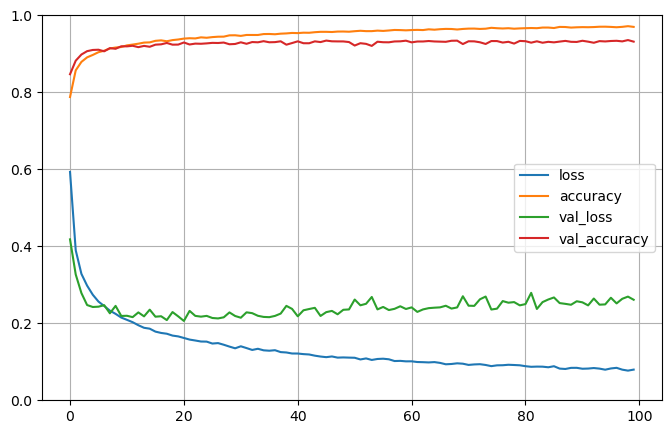

In [128]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [130]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2843 - accuracy: 0.9270


[0.28426888585090637, 0.9269999861717224]